# Chrono Trigger
Running some tests with the data found [here](https://docs.google.com/spreadsheets/d/19X5OfcvansoOZrAgIwW3BYhITnEAXFITMG14KkopWnU/edit#gid=1156088696)

## Importing character data

Creating a simple `Character` class that takes care of reading the data, storing it and saving the character name, to make plotting easier.

In [76]:
import numpy as np
import pandas as pd


class Character(object):
    def __init__(self, csv_path):
        self.name = csv_path.split('/')[-1].split('.')[0]
        self.data = pd.read_csv(csv_path)

    def get_data(self):
        return self.data

    def get_name(self):
        return self.name

    def get_hp(self):
        return self.data["HP"]

crono = Character("./data/Crono.csv")
ayla = Character("./data/Ayla.csv")
frog  = Character("./data/Frog.csv")
lucca = Character("./data/Lucca.csv")
marle = Character("./data/Marle.csv")
magus = Character("./data/Magus.csv")
robo = Character("./data/Robo.csv")

all_characters = [crono, lucca, frog, marle, robo, ayla, magus]

print(crono.name)
print(crono.data)

Crono
    Level   HP  MP  Evasion  Hit  Magic  Magic Defense  Power  Stamina
0       1   70   8        8    8      5              2      5        8
1       2   83  10        8    8      5              3      6        9
2       3   96  12        8    8      5              5      7       11
3       4  109  14        9    8      6              6      9       12
4       5  122  16        9    9      6              8     10       14
..    ...  ...  ..      ...  ...    ...            ...    ...      ...
94     95  999  99       43   36     44             99     99       99
95     96  999  99       44   36     44             99     99       99
96     97  999  99       44   36     45             99     99       99
97     98  999  99       44   37     45             99     99       99
98     99  999  99       45   37     46             99     99       99

[99 rows x 9 columns]


## Importing items data

In [3]:
weapons = pd.read_csv("./data/Weapons.csv")
helmets = pd.read_csv("./data/Helmets.csv")
armors = pd.read_csv("./data/Armors.csv")
accessories = pd.read_csv("./data/Accessories.csv")

## Comparing HP

<AxesSubplot:>

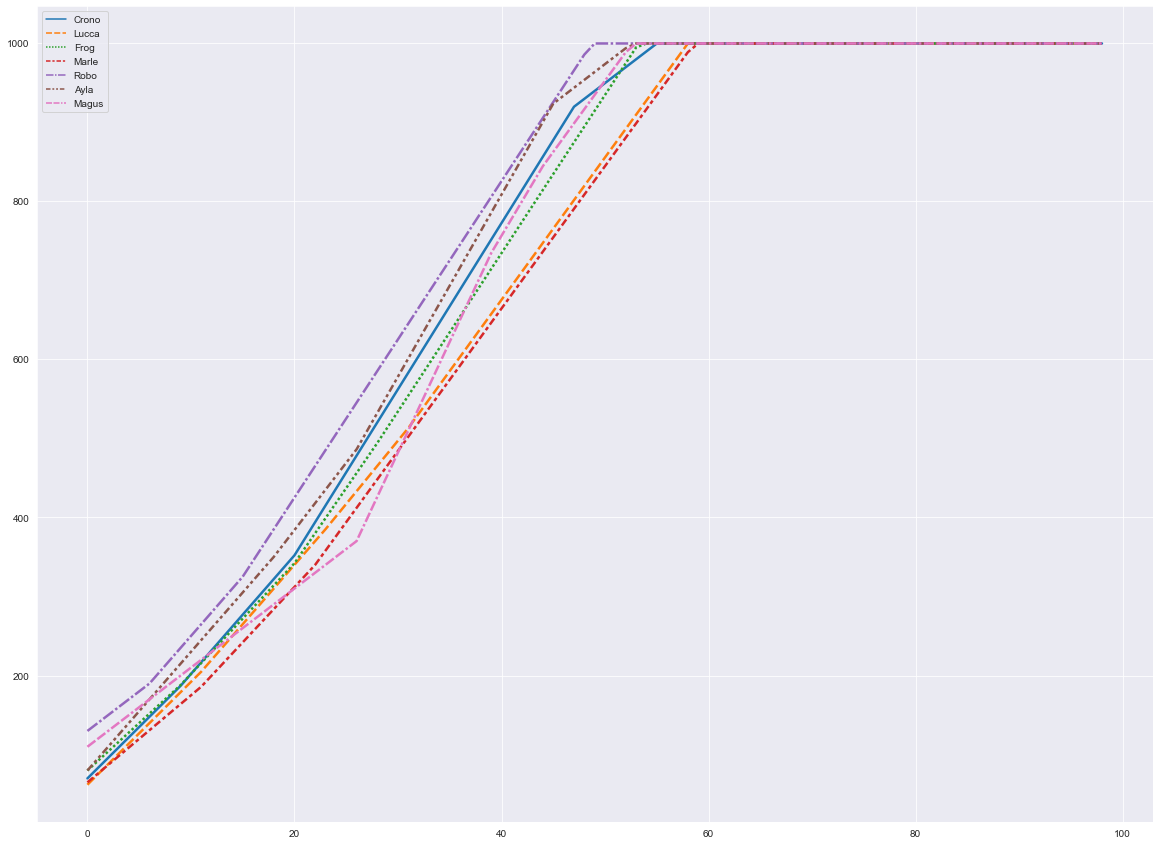

In [97]:
import matplotlib
import seaborn as sns

matplotlib.rcParams['figure.figsize'] = [20, 15]

def get_full_hp(char):
    data = char.get_data()
    return data["HP"]

def get_hp(char):
    # Getting the HP until it hits 999 once, then we don't need to get it anymore
    data = char.get_data()
    hp = data["HP"]
    unique = []
    hit_top = False
    for h in hp:
        if not hit_top:
            unique.append(h)
            if h == 999:
                hit_top = True
    return unique

values = {}
names = []
for c in all_characters:
    hp = get_full_hp(c)
    values[c.get_name()] = hp

data = pd.DataFrame(data=values)
sns.set_style("darkgrid")
sns.lineplot(data=data, linewidth=2.5)